In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

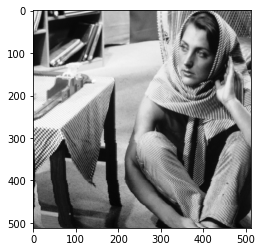

In [19]:
img = cv2.imread('barbara_gray.bmp',0)
plt.imshow(img, cmap='gray');

## Salt and pepper noise

In [20]:
def salt_pepper_noise(image: np.ndarray, salt_probability):
    '''
    Implement Salt and Pepper Noise
    Parameters:
        image: input image
        salt_probability: probability of salt noise
    '''
    noisy_image = np.zeros(image.shape, np.uint8)
    pepper_probability = 1 - salt_probability 

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Randomly generate a number between 0 and 1 to get salt probability
            prob = np.random.uniform(0, 1)
            
            # Add Salt Noise
            if prob < salt_probability:
                noisy_image[i,j] = 0

            # Add Pepper Noise
            elif prob > pepper_probability:
                noisy_image[i,j] = 255

            # Add Original Image
            else:
                noisy_image[i,j] = image[i,j]
                
    return noisy_image

## Median Filter

In [21]:
def median_filter(image:np.ndarray, n) -> np.ndarray:
        '''
        Implement Median Filter
        Parameters:
            image: input image
            n: size of the median filter
        '''
        smooth_img = image.copy()

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # Get the height and width of the median filter
                row_start, row_end = max(0, i - (n//2)), i + n//2 + 1
                col_start, col_end = max(0, j - (n//2)), j + n//2 + 1
                
                # Take the median of the median filter mask
                smooth_img[i,j] = np.median(image[row_start:row_end, col_start:col_end])        
        
        return smooth_img

## Function to calculate PSNR between input image & denoised image

In [22]:
# PSNR (Peak Signal to Noise Ratio) between original image and denoisy image

def psnr(img1:np.ndarray, img2:np.ndarray) -> float:
    MSE = np.sum((img1 - img2) ** 2) / (img1.shape[0] * img1.shape[1])
    if MSE == 0:
        return 100
    PIXEL_MAXVALUE = 255.0
    return 10 * np.log10(PIXEL_MAXVALUE**2 / MSE)

## Salt & Pepper noise with 5% corrupted pixels

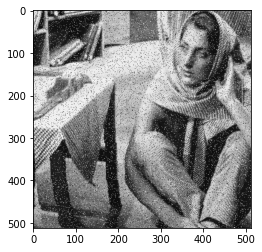

In [23]:
noisy_img = salt_pepper_noise(img, 0.05)
plt.imshow(noisy_img, cmap='gray');
plt.imsave('images/noisy_img_5.png', noisy_img, cmap='gray')

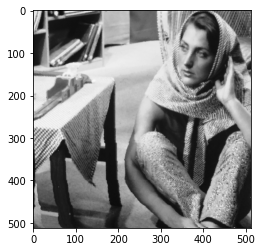

In [24]:
denoisy_img = median_filter(noisy_img, 3)
plt.imshow(denoisy_img, cmap='gray');
plt.imsave('images/denoisy_img_5.png', denoisy_img, cmap='gray')

In [25]:
psnr(img, denoisy_img)

32.67258999058693

## Salt & Pepper noise with 15% corrupted pixels

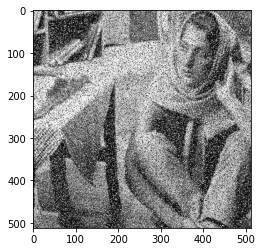

In [26]:
noisy_img = salt_pepper_noise(img, 0.15)
plt.imshow(noisy_img, cmap='gray');
plt.imsave('images/noisy_img_15.png', noisy_img, cmap='gray')

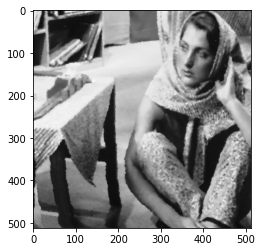

In [27]:
denoisy_img = median_filter(noisy_img, 4)
plt.imshow(denoisy_img, cmap='gray');
plt.imsave('images/denoisy_img_15.png', denoisy_img, cmap='gray')

In [28]:
psnr(img, denoisy_img)

31.301745708463873

## Salt & Pepper noise with 20% corrupted pixels

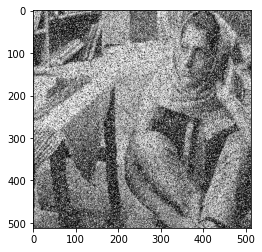

In [29]:
noisy_img = salt_pepper_noise(img, 0.20)
plt.imshow(noisy_img, cmap='gray');
plt.imsave('images/noisy_img_20.png', noisy_img, cmap='gray')

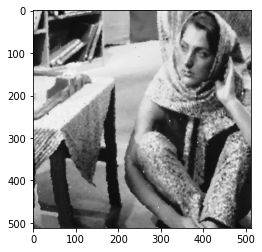

In [30]:
denoisy_img = median_filter(noisy_img, 5)
plt.imshow(denoisy_img, cmap='gray');
plt.imsave('images/denoisy_img_20.png', denoisy_img, cmap='gray')

In [31]:
psnr(img, denoisy_img)

31.142437415218737

## Salt & Pepper noise with 25% corrupted pixels

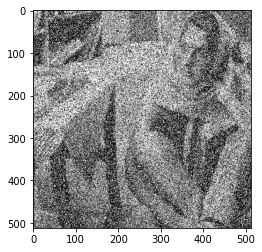

In [32]:
noisy_img = salt_pepper_noise(img, 0.25)
plt.imshow(noisy_img, cmap='gray');
plt.imsave('images/noisy_img_25.png', noisy_img, cmap='gray')

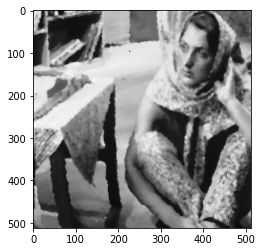

In [33]:
denoisy_img = median_filter(noisy_img, 6)
plt.imshow(denoisy_img, cmap='gray');
plt.imsave('images/denoisy_img_25.png', denoisy_img, cmap='gray')

In [34]:
psnr(img, denoisy_img)

30.78075191499933